In [1]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper
import util.trading_systems as ts

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research']


In [3]:
def scale(p):
    m = max(p)
    n = min(p)
    if abs(n)>abs(m):
        m = abs(n)
    arr = [0.0] * len(p)
    for i in range(len(p)):
        arr[i] = p[i] / m
    return arr

In [4]:
with open('price.pickle','rb') as f:
    results = pickle.load(f)

In [5]:
len(results)

2115

2047
147948714.0 1.0 417754.99303952354 577.4285714285714


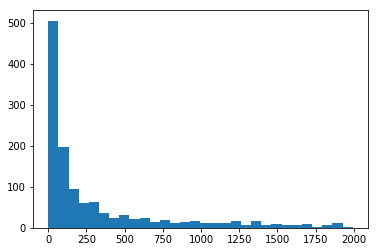

In [6]:
quants = [np.mean(items.getQuants(item)[-7:]) for item in results if len(items.getQuants(item))>0]
print(len(quants))
print(max(quants),min(quants),np.mean(quants),np.median(quants))
plt.hist([a for a in quants if a <2000],30)
plt.show()

In [7]:
itemList = [item for item in results if len(items.getQuants(item))>0 and np.mean(items.getQuants(item)[-7:])>100 and np.median(items.getPrices(item)[-7:])>100]
print(len(itemList))

1064


In [8]:
results['Abyssal_whip'].keys()

dict_keys(['model_opt', 'buyAndHold', 'testPrices', 'momentum_model', 'perfect', 'startLoss', 'sma', 'predictions', 'numPrices', 'sma_model', 'stochOscil', 'momentum', 'numItems', 'item', 'persist', 'numEpochs', 'model', 'endLoss', 'startMAE', 'endMAE', 'opt_params', 'stochOscil_model'])

In [84]:
items.getCats('Abyssal_whip')

['Items',
 'Grand Exchange items',
 'Tradeable items',
 "Members' items",
 'Equipment',
 'Weapon slot items',
 'Slash weapons',
 'Melee weapons',
 'Slayer',
 'Weapons with Special attacks',
 'Items needed for an emote clue',
 'Equipable items']

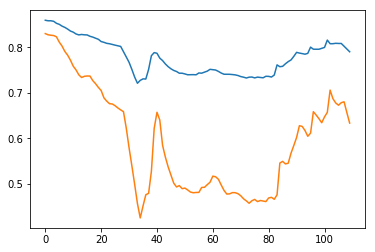

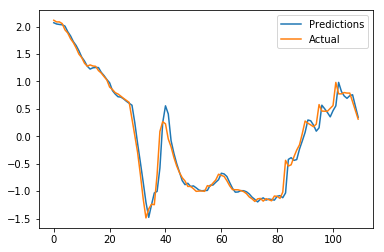

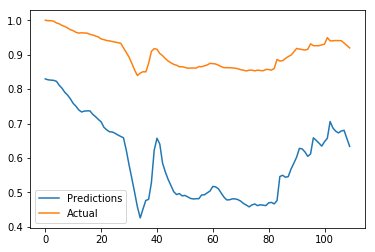

In [104]:
p = scale(items.getPrices('Abyssal_whip'))
p = p[-len(results['Abyssal_whip']['predictions']):]
plt.plot(p)
plt.plot(results['Abyssal_whip']['predictions'])
plt.show()

scaler = StandardScaler()
plt.plot(scaler.fit_transform(np.array(results['Abyssal_whip']['predictions']).reshape(-1,1)), label='Predictions')
plt.plot(scaler.fit_transform(np.array(scale(results['Abyssal_whip']['testPrices'])).reshape(-1,1)), label = 'Actual')
plt.legend()
plt.show()
scaler = StandardScaler()
plt.plot(results['Abyssal_whip']['predictions'], label='Predictions')
plt.plot(scale(results['Abyssal_whip']['testPrices']), label = 'Actual')
plt.legend()
plt.show()

In [34]:
modelProfs = [(item,results[item]['model']) for item in itemList]
modelProfs = sorted(modelProfs, key=lambda x: x[1], reverse=True)
modelProfs_opt = [(item,results[item]['model_opt']) for item in itemList]
modelProfs_opt = sorted(modelProfs_opt, key=lambda x: x[1], reverse=True)

In [35]:
pprint(modelProfs[:5])
pprint(modelProfs[-5:])
pprint(modelProfs_opt[:5])
pprint(modelProfs_opt[-5:])

[('Mind_talisman', 17.2204329004329),
 ('Vampyre_dust', 5.135090909090909),
 ('Cleaning_cloth', 5.055311572700297),
 ('Wool', 3.5457971014492755),
 ('Leaping_sturgeon', 2.738325991189427)]
[('Kharyrll_teleport', -0.2847852046017184),
 ('Dwarf_weed', -0.33421445950643036),
 ('Raw_shark', -0.33875455650060754),
 ('Bread_dough', -0.34063446969696953),
 ('Emerald_bolts', -0.3870588235294118)]
[('Mind_talisman', 14.554112554112555),
 ('Coconut', 2.6880952380952383),
 ('Black_battleaxe', 2.457391304347826),
 ('Bronze_set_(lg)', 2.404255319148936),
 ('Goblin_mail', 1.8202764976958525)]
[('Antifire_potion(4)', -0.7557548579970106),
 ('Adamant_platelegs_(g)', -0.7571757090537433),
 ('Adamant_kiteshield_(t)', -0.7766969761048848),
 ('Pineapple_sapling', -0.8806129722024234),
 ('Pineapple_seed', -0.927927329556554)]


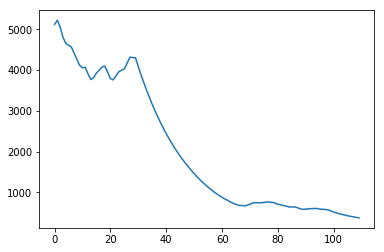

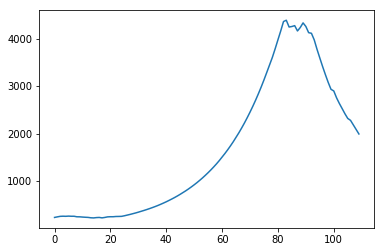

In [108]:
plt.plot(results['Pineapple_seed']['testPrices'])
plt.show()
plt.plot(results['Mind_talisman']['testPrices'])
plt.show()

In [112]:
prices = [scale(results[item]['testPrices']) for item in itemList]
pricesMeans = [np.mean(a) for a in prices]
pricesRange = [np.ptp(a) for a in prices]
pricesSTD = [np.std(a) for a in prices]
print(np.mean(pricesMeans))
print(np.mean(pricesRange),max(pricesRange),min(pricesRange))
print(np.mean(pricesSTD))

0.8203883086095323
0.31053677386171236 0.9496468443836865 0.0022216858820836016
0.08276717926224154


In [36]:
mp = [a[1] for a in modelProfs]
mpo = [a[1] for a in modelProfs_opt]

In [37]:
print(np.mean(mp),np.median(mp),np.std(mp),max(mp),min(mp))

0.15920147655925748 0.016509318645627255 0.6767589508217641 17.2204329004329 -0.3870588235294118


In [38]:
print(np.mean(mpo),np.median(mpo),np.std(mpo),max(mpo),min(mpo))

-0.01063277887598811 -0.002106161811973423 0.5367541241546684 14.554112554112555 -0.927927329556554


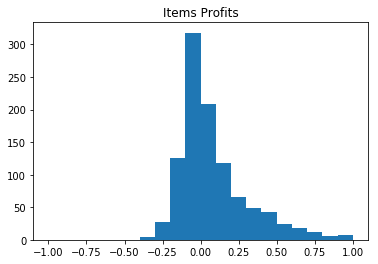

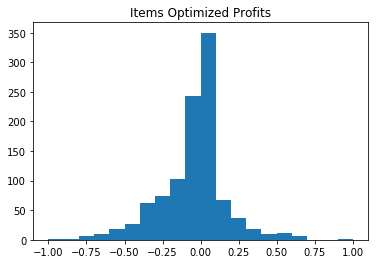

In [42]:
plt.hist(mp,20,range=(-1,1))
plt.title('Items Profits')
plt.show()
plt.hist(mpo,20,range=(-1,1))
plt.title('Items Optimized Profits')
plt.show()

In [12]:
modVSpers = [(item,results[item]['model']-results[item]['persist']) for item in itemList]
modVSbah = [(item,results[item]['model']-results[item]['buyAndHold']) for item in itemList]
mod_optVSpers = [(item,results[item]['model_opt']-results[item]['persist']) for item in itemList]
mod_optVSbah = [(item,results[item]['model_opt']-results[item]['buyAndHold']) for item in itemList]

In [13]:
modVSpers = sorted(modVSpers, key=lambda x: x[1], reverse=True)
modVSbah = sorted(modVSbah, key=lambda x: x[1], reverse=True)
mod_optVSpers = sorted(mod_optVSpers, key=lambda x: x[1], reverse=True)
mod_optVSbah = sorted(mod_optVSbah, key=lambda x: x[1], reverse=True)

In [14]:
pprint(modVSpers[0:10])
pprint(mod_optVSpers[0:10])

[('Vampyre_dust', 0.677090909090909),
 ('Monkey_nuts', 0.6134332425068122),
 ('Desert_goat_horn', 0.604601593625498),
 ('Strung_rabbit_foot', 0.5574599576911453),
 ('Cooked_sweetcorn', 0.5113266998341626),
 ('Super_defence(3)', 0.5103888213851762),
 ('Antifire_potion(2)', 0.5069082125603865),
 ('Amulet_of_the_damned_(full)', 0.48736335107329487),
 ('Extended_antifire(1)', 0.4507),
 ('Weapon_poison', 0.45036764705882354)]
[('Antifire_potion(2)', 0.5279951690821256),
 ('Strength_mix(2)', 0.44666666666666666),
 ('Super_defence(3)', 0.4417010935601458),
 ('Agility_potion(3)', 0.44127243066884175),
 ('Super_defence(2)', 0.41852487135506006),
 ('Super_defence(1)', 0.39406153846153846),
 ('Defence_potion(3)', 0.3859812206572771),
 ('Antidote++(1)', 0.3596629213483146),
 ('Agility_potion(1)', 0.3523175182481752),
 ('Super_energy(2)', 0.30671736375158426)]


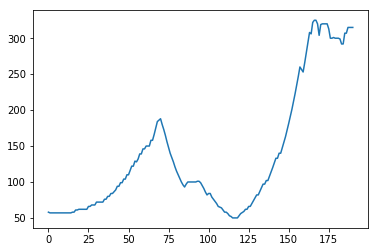

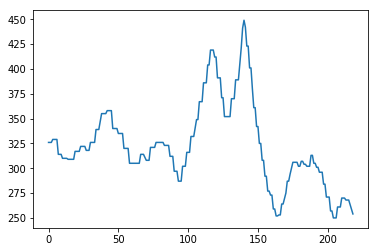

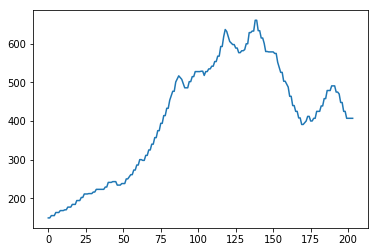

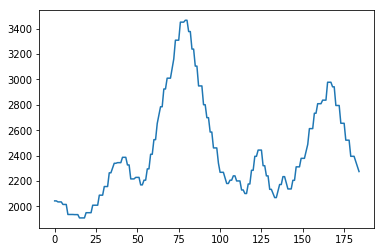

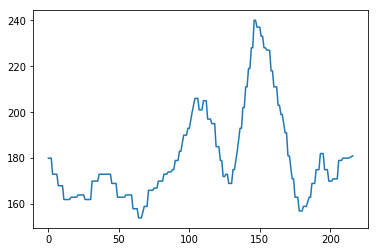

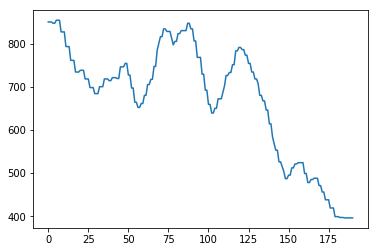

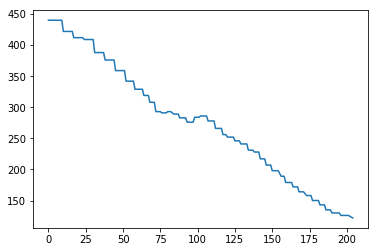

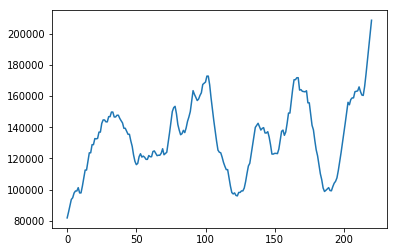

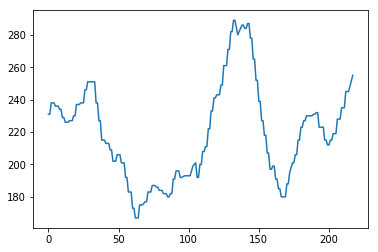

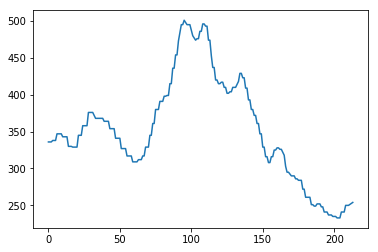

In [15]:
for a in modVSpers[0:10]:
    prices = items.getPrices(a[0])
    prices = prices[int(.85*len(prices)):]
    plt.plot(prices)
    plt.show()

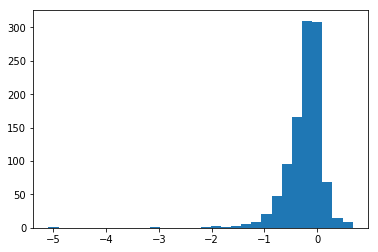

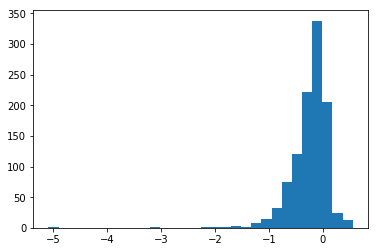

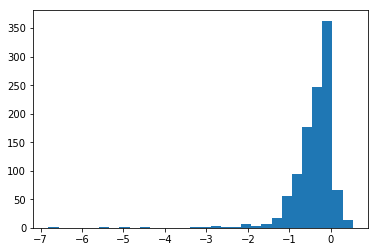

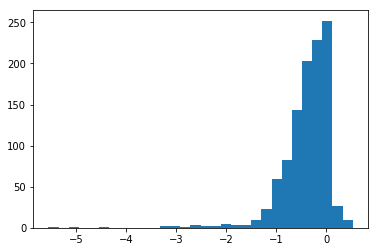

In [16]:
plt.hist([a[1] for a in modVSpers],30)
plt.show()
plt.hist([a[1] for a in modVSpers if a[1]>-6 and a[1]<.6],30)
plt.show()
plt.hist([a[1] for a in mod_optVSpers],30)
plt.show()
plt.hist([a[1] for a in mod_optVSpers if a[1]>-6 and a[1]<.6],30)
plt.show()

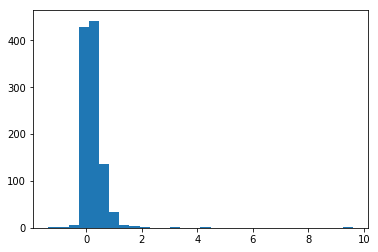

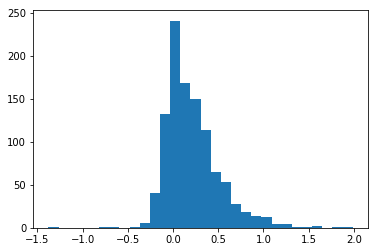

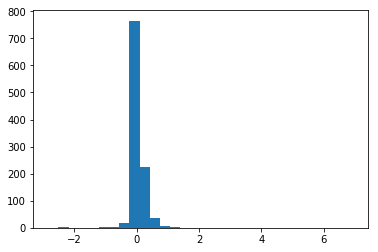

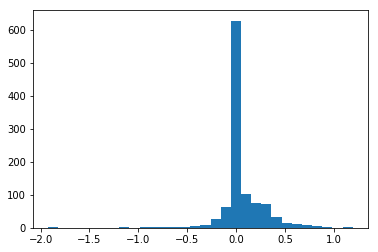

In [17]:
plt.hist([a[1] for a in modVSbah],30)
plt.show()
plt.hist([a[1] for a in modVSbah if a[1]>-2 and a[1]<2],30)
plt.show()
plt.hist([a[1] for a in mod_optVSbah],30)
plt.show()
plt.hist([a[1] for a in mod_optVSbah if a[1]>-2 and a[1]<2],30)
plt.show()

In [43]:
numProfModels = len([a for a in modelProfs if a[1]>0])
numProfmodVSpers = len([a for a in modVSpers if a[1]>0])
numProfmodVSbah = len([a for a in modVSbah if a[1]>0])
numProfModels_opt = len([a for a in modelProfs_opt if a[1]>0])
numProfmod_optVSpers = len([a for a in mod_optVSpers if a[1]>0])
numProfmod_optVSbah = len([a for a in mod_optVSbah if a[1]>0])

In [44]:
print(len(itemList))
print(numProfModels/len(itemList))
print(numProfmodVSpers/len(itemList))
print(numProfmodVSbah/len(itemList))
print(numProfModels_opt/len(itemList))
print(numProfmod_optVSpers/len(itemList))
print(numProfmod_optVSbah/len(itemList))

1064
0.549812030075188
0.20958646616541354
0.7368421052631579
0.299812030075188
0.14943609022556392
0.5949248120300752


In [48]:
perf = [results[item]['perfect'] for item in itemList]
modVSperf = [results[item]['perfect'] -results[item]['model'] for item in itemList]
modoptVSperf = [results[item]['perfect'] -results[item]['model_opt'] for item in itemList]

In [49]:
print(np.mean(perf),np.median(perf),np.std(perf),max(perf),min(perf))
print(np.mean(modVSperf),np.median(modVSperf),np.std(modVSperf),max(modVSperf),min(modVSperf))
print(np.mean(modoptVSperf),np.median(modoptVSperf),np.std(modoptVSperf),max(modoptVSperf),min(modoptVSperf))

1.107599350496692 0.8149309202673669 1.254123968950026 23.296017316017316 0.0
0.9483978739374344 0.7577024051490514 0.789059449481238 7.340547619047619 0.0
1.11823212937268 0.9167619688565548 0.9670479642944024 9.285507246376811 0.0


In [54]:
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))[0][1]
autocorr(results['Abyssal_whip']['testPrices'])

0.9860362998482942

375.73912424456057


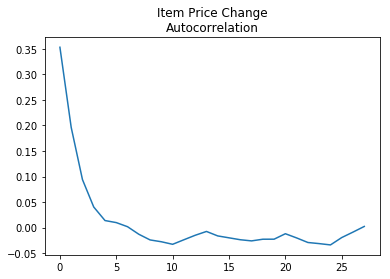

In [66]:
arr = [0.0]*28
for item in itemList:
    for j in range(1,29):
        arr[j-1] += autocorr(items.getPriceChanges(results[item]['testPrices']),j)
print(arr[0])
for j in range(28):
    arr[j] /= len(itemList)
plt.plot(arr)
plt.title('Item Price Change\nAutocorrelation')
plt.show()

In [67]:
actualModProfs = [(item,items.getPrices(item)[-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfs = sorted(actualModProfs, key=lambda x: x[1], reverse=True)

actualPersProfs = [(item,items.getPrices(item)[-1]*results[item]['persist']) for item in results if items.getPrices(item)[-1]<10000000]
actualPersProfs = sorted(actualPersProfs, key=lambda x: x[1], reverse=True)

actualPersVsModProfs = [(item,items.getPrices(item)[-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000 and (results[item]['model']-results[item]['persist'])>0]
actualPersVsModProfs = sorted(actualPersVsModProfs, key=lambda x: x[1], reverse=True)

In [68]:
actualModProfsPerDay = [(item,(items.getPrices(item)[-1]*results[item]['model'])/(results[item]['numPrices']*.15)) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfsPerDay = sorted(actualModProfsPerDay, key=lambda x: x[1], reverse=True)
actualPersProfsPerDay = [(item,(items.getPrices(item)[-1]*results[item]['persist'])/(results[item]['numPrices']*.15)) for item in results if items.getPrices(item)[-1]<10000000]
actualPersProfsPerDay = sorted(actualPersProfsPerDay, key=lambda x: x[1], reverse=True)

In [69]:
pprint(actualModProfs[0:10])
pprint(actualPersProfs[0:10])
pprint(actualPersVsModProfs[0:10])

[("Pharaoh's_sceptre_(3)", 2669016.725791948),
 ("Pharaoh's_sceptre", 2270221.7892197343),
 ('Serpentine_helm_(uncharged)', 2203682.1919172825),
 ("Rangers'_tunic", 2192806.6648344216),
 ('Royal_crown', 1838322.4747012183),
 ('Staff_of_the_dead', 1731282.337685034),
 ('Eternal_crystal', 1579483.913986813),
 ("Ahrim's_armour_set", 1399698.4266153674),
 ('Gilded_boots', 1324728.4788384256),
 ('Smoke_battlestaff', 1283897.0774027621)]
[('Serpentine_visage', 5580604.596956462),
 ('Serpentine_helm_(uncharged)', 4984908.811879121),
 ('Magic_fang', 4571349.047034691),
 ("Pharaoh's_sceptre_(3)", 4419855.320429062),
 ('Uncharged_toxic_trident', 4379345.639766955),
 ('Staff_of_the_dead', 3693987.2273561717),
 ('Toxic_staff_(uncharged)', 3663066.308900933),
 ("Rangers'_tunic", 3360593.6485418077),
 ("Pharaoh's_sceptre", 3296886.492385386),
 ('Old_school_bond', 2490967.3781545726)]
[("Ahrim's_robetop_0", 716610.4988754994),
 ('3rd_age_mage_hat', 582580.4680968804),
 ('Infinity_hat', 557932.7042378

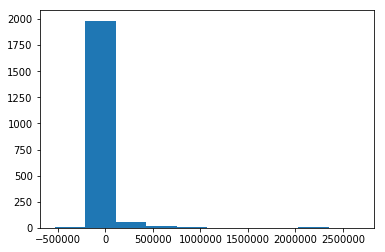

In [70]:
plt.hist([a[1] for a in actualModProfs])
plt.show()

In [72]:
prices = [items.getPrices(item)[-1] for item in itemList]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in itemList]
profs = [results[item]['model'] for item in itemList]
pers = [results[item]['persist'] for item in itemList]
perf = [results[item]['perfect'] for item in itemList]
bah = [results[item]['buyAndHold'] for item in itemList]
sma = [results[item]['sma'] for item in itemList]
stochOscil = [results[item]['stochOscil'] for item in itemList]
momentum = [results[item]['momentum'] for item in itemList]
mae = [results[item]['endMAE'] for item in itemList]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in itemList]

In [77]:
print(np.mean(profs), np.median(profs),np.std(profs), max(profs),min(profs))
print(np.mean(bah), np.median(bah),np.std(bah),max(bah),min(bah))
print(np.mean(pers), np.median(pers),np.std(pers),max(pers),min(pers))
print(np.mean(perf), np.median(perf),np.std(perf),max(perf),min(perf))
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profs,sma',np.corrcoef(profs,sma)[0][1])
print('profs,stochOscil',np.corrcoef(profs,stochOscil)[0][1])
print('profs,momentum',np.corrcoef(profs,momentum)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

0.15920147655925745 0.016509318645627255 0.6767589508217641 17.2204329004329 -0.3870588235294118
-0.06715777806060792 -0.06715804203262293 0.4176498939914686 7.619047619047619 -0.9265481539363157
0.3931231607976548 0.2059469440865339 0.8296268849265508 17.25935064935065 -0.5279951690821256
1.107599350496692 0.8149309202673669 1.254123968950026 23.296017316017316 0.0
price,profs -0.023427918352760015
bl,price -0.10549150535472436
prof,pers 0.9017045629052187
profs,perf 0.8295917597372059
profs,bah 0.7582285291870033
profs,sma 0.9309344221825416
profs,stochOscil 0.871441871593512
profs,momentum 0.8973842936533505
profdiff,mae 0.10533760892466514
prices,mae 0.05364779688480283
profs,mae 0.08496245305130894
profdiff,mae 0.10533760892466514


In [ ]:
prices = [items.getPrices(item)[-1] for item in results if results[item]['model']>results[item]['persist']]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results if results[item]['model']>results[item]['persist']]
profs = [results[item]['model'] for item in results if results[item]['model']>results[item]['persist']]
pers = [results[item]['persist'] for item in results if results[item]['model']>results[item]['persist']]
perf = [results[item]['perfect'] for item in results if results[item]['model']>results[item]['persist']]
bah = [results[item]['buyAndHold'] for item in results if results[item]['model']>results[item]['persist']]
sma = [results[item]['sma'] for item in results if results[item]['model']>results[item]['persist']]
stochOscil = [results[item]['stochOscil'] for item in results if results[item]['model']>results[item]['persist']]
momentum = [results[item]['momentum'] for item in results if results[item]['model']>results[item]['persist']]
mae = [results[item]['endMAE'] for item in results if results[item]['model']>results[item]['persist']]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results if results[item]['model']>results[item]['persist']]

In [ ]:
print(np.mean(profs))
print(np.median(profs))
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profs,sma',np.corrcoef(profs,sma)[0][1])
print('profs,stochOscil',np.corrcoef(profs,stochOscil)[0][1])
print('profs,momentum',np.corrcoef(profs,momentum)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

In [ ]:
prices = [items.getPrices(item)[-1] for item in results if results[item]['model']>0]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results if results[item]['model']>0]
profs = [results[item]['model'] for item in results if results[item]['model']>0]
pers = [results[item]['persist'] for item in results if results[item]['model']>0]
perf = [results[item]['perfect'] for item in results if results[item]['model']>0]
bah = [results[item]['buyAndHold'] for item in results if results[item]['model']>0]
mae = [results[item]['endMAE'] for item in results if results[item]['model']>0]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results if results[item]['model']>0]

In [ ]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

In [ ]:
prices = [items.getPrices(item)[-1] for item in results if results[item]['model']<0]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results if results[item]['model']<0]
profs = [results[item]['model'] for item in results if results[item]['model']<0]
pers = [results[item]['persist'] for item in results if results[item]['model']<0]
perf = [results[item]['perfect'] for item in results if results[item]['model']<0]
bah = [results[item]['buyAndHold'] for item in results if results[item]['model']<0]
mae = [results[item]['endMAE'] for item in results if results[item]['model']<0]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results if results[item]['model']<0]

In [ ]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

In [ ]:
item = "Abyssal_whip"
items.getInfo(item)

In [ ]:
modelProfs = [(item,results[item]['model']) for item in results if items.getInfo(item)['members']=='True']
modelProfs = sorted(modelProfs, key=lambda x: x[1], reverse=True)
modelProfs_opt = [(item,results[item]['model_opt']) for item in results if items.getInfo(item)['members']=='True']
modelProfs_opt = sorted(modelProfs, key=lambda x: x[1], reverse=True)
modVSpers = [(item,results[item]['model']-results[item]['persist']) for item in results if items.getInfo(item)['members']=='True']
modVSbah = [(item,results[item]['model']-results[item]['buyAndHold']) for item in results if items.getInfo(item)['members']=='True']
mod_optVSpers = [(item,results[item]['model_opt']-results[item]['persist']) for item in results if items.getInfo(item)['members']=='True']
mod_optVSbah = [(item,results[item]['model_opt']-results[item]['buyAndHold']) for item in results if items.getInfo(item)['members']=='True']

In [ ]:
modVSpers = sorted(modVSpers, key=lambda x: x[1], reverse=True)
modVSbah = sorted(modVSbah, key=lambda x: x[1], reverse=True)
mod_optVSpers = sorted(mod_optVSpers, key=lambda x: x[1], reverse=True)
mod_optVSbah = sorted(mod_optVSbah, key=lambda x: x[1], reverse=True)

In [ ]:
plt.hist([a[1] for a in modVSpers],30)
plt.show()
plt.hist([a[1] for a in modVSpers if a[1]>-1 and a[1]<1],30)
plt.show()
plt.hist([a[1] for a in mod_optVSpers],30)
plt.show()
plt.hist([a[1] for a in mod_optVSpers if a[1]>-1 and a[1]<1],30)
plt.show()

In [ ]:
numProfModels = len([a for a in modelProfs if a[1]>0])
numProfmodVSpers = len([a for a in modVSpers if a[1]>0])
numProfmodVSbah = len([a for a in modVSbah if a[1]>0])
numProfModels_opt = len([a for a in modelProfs_opt if a[1]>0])
numProfmod_optVSpers = len([a for a in mod_optVSpers if a[1]>0])
numProfmod_optVSbah = len([a for a in mod_optVSbah if a[1]>0])

In [26]:
print(len(results))
print(numProfModels/len(results))
print(numProfmodVSpers/len(results))
print(numProfmodVSbah/len(results))
print(numProfModels_opt/len(results))
print(numProfmod_optVSpers/len(results))
print(numProfmod_optVSbah/len(results))

2115
0.2765957446808511
0.10543735224586288
0.3706855791962175
0.2765957446808511
0.075177304964539
0.29929078014184396


In [27]:
def getCumulative(itemArr, n=1200):
    arr = [0.0]*n
    num = 0
    for i in range(len(itemArr)):
        p = results[itemArr[i]]['testPrices']
        if len(p)>=n:
            num += 1
            p = scale(p[-1*n:])
            for j in range(n):
                arr[j] += p[j]
    for i in range(n):
        arr[i] /= num
    return arr

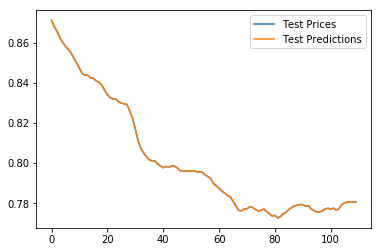

In [28]:
plt.plot(getCumulative(list(results.keys()),len(results['Abyssal_whip']['testPrices'])), label='Test Prices')
plt.plot(getCumulative(list(results.keys()),len(results['Abyssal_whip']['predictions'])), label='Test Predictions')
plt.legend()
plt.show()

In [79]:
numEpochs = [results[item]['numEpochs'] for item in itemList]

In [80]:
print(np.mean(numEpochs),np.median(numEpochs))

35.901315789473685 21.0


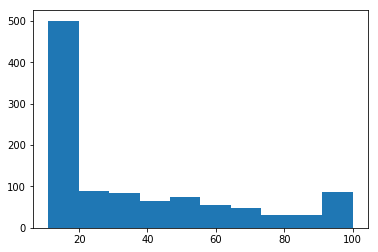

In [81]:
plt.hist(numEpochs)
plt.show()

In [86]:
dic = {}
for item in itemList:
    cats = items.getCats(item)
    for c in cats:
        if c in dic:
            dic[c].append(results[item]['model'])
        else:
            dic[c] = [results[item]['model']]

In [102]:
catProfs = [(c,len(dic[c]),np.mean(dic[c])) for c in dic.keys() if len(dic[c])>=10]
catProfs = sorted(catProfs, key=lambda x: x[2], reverse=True)
print([np.mean(profs)])

[0.15920147655925745]


In [103]:
catProfs

[('God books', 20, 0.5359277024318523),
 ('Produce', 19, 0.4611852433735322),
 ('Boots', 19, 0.41394232308279005),
 ('Feet slot items', 24, 0.33878643402551195),
 ('Farming', 55, 0.32205567023128884),
 ('Tools', 13, 0.2932262019038775),
 ('Pies', 12, 0.2786128337699843),
 ('Fish', 19, 0.27724949344369615),
 ('Seeds', 19, 0.25524068529634536),
 ('Treasure Trails rewards', 79, 0.25273452505265176),
 ('Old School-exclusive content', 69, 0.22886284907837204),
 ('Stackable items', 139, 0.2091261972541387),
 ('Prayer items', 50, 0.2089554689107722),
 ('Quest items', 24, 0.19592504570109207),
 ('Black', 22, 0.1867006129930724),
 ('Crafting items', 18, 0.18507514082103116),
 ('Untradeable items', 36, 0.16997022745195206),
 ('Free-to-play items', 313, 0.1694264767816941),
 ('Amulets', 21, 0.16841375427905783),
 ('Items', 1059, 0.15961977157004933),
 ('Grand Exchange items', 1059, 0.15961977157004933),
 ('Tradeable items', 1059, 0.15961977157004933),
 ('Neck slot items', 40, 0.1564247622642208),